# World Happiness Report

In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# reading the dataset
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv")

In [3]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [4]:
# df shows the dataset which contains 158 rows and 12 columns
# The main important thing here is that our target column is Happiness Score. 
# So we are building the model to predict the Happiness score based on the other column infos 
# and here the target column "Happiness Score" has continuous values and hence its a regression problem. 
# We need to choose the regression models to solve this problem

# EDA(Exploratory Data Analysis)

In [5]:
df.head()    

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [6]:
# df.head() displays the first 5 row values(indexed from 0-4) from the dataset

In [7]:
df.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [8]:
#df.tail() displays the last 5 rows from the dataset(indexed from 153-157), so from here we can draw conclusion that we have 158 rows in total(0-157)

In [9]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [10]:
# df.columns displays the list of all column headings 

In [11]:
df.shape

(158, 12)

In [12]:
# No. of rows is 158
# No. of columns is 12

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [14]:
# from df.info() we can infer that we have 158 row entries in total(0-157)
# we have 12 data columns(0-11)
# Each data column contains no null values, hence the non-null count is 158 for all the 12 columns
# From here we can also infer that the columns "Country" and "Region" are not identified by Python and has string values and hence its datatype is seen as Object
# The column "Happiness Score" has all integer values and hence the Datatype is int
# All the rest 9 columns contains float values and hence its datatypes are identified as float


In [15]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [16]:
# we have already made note of the datatypes from df.info()
# Using df.dtype to separately check only for the column datatypes

In [17]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [18]:
# This tells that they are no null values in any column of the dataset

In [19]:
df["Happiness Score"].unique()

array([7.587, 7.561, 7.527, 7.522, 7.427, 7.406, 7.378, 7.364, 7.286,
       7.284, 7.278, 7.226, 7.2  , 7.187, 7.119, 6.983, 6.946, 6.94 ,
       6.937, 6.901, 6.867, 6.853, 6.81 , 6.798, 6.786, 6.75 , 6.67 ,
       6.611, 6.575, 6.574, 6.505, 6.485, 6.477, 6.455, 6.411, 6.329,
       6.302, 6.298, 6.295, 6.269, 6.168, 6.13 , 6.123, 6.003, 5.995,
       5.987, 5.984, 5.975, 5.96 , 5.948, 5.89 , 5.889, 5.878, 5.855,
       5.848, 5.833, 5.828, 5.824, 5.813, 5.791, 5.77 , 5.759, 5.754,
       5.716, 5.709, 5.695, 5.689, 5.605, 5.589, 5.548, 5.477, 5.474,
       5.429, 5.399, 5.36 , 5.332, 5.286, 5.268, 5.253, 5.212, 5.194,
       5.192, 5.14 , 5.129, 5.124, 5.123, 5.102, 5.098, 5.073, 5.057,
       5.013, 5.007, 4.971, 4.959, 4.949, 4.898, 4.885, 4.876, 4.874,
       4.867, 4.857, 4.839, 4.8  , 4.788, 4.786, 4.739, 4.715, 4.694,
       4.686, 4.681, 4.677, 4.642, 4.633, 4.61 , 4.571, 4.565, 4.55 ,
       4.518, 4.517, 4.514, 4.512, 4.507, 4.436, 4.419, 4.369, 4.35 ,
       4.332, 4.307,

In [20]:
# This proves that there are no unique values in the target column and has continuous values as seen, hence a regression problem

In [21]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [22]:
# From df.describe() we can see the details about various statistical data like Count,Mean,Standard Deviation,Max Value,Min Value for our dataset
# So from min and max values, we basically get the range

In [23]:
df.duplicated().sum()

0

In [24]:
# This shows that our dataset do not contain any duplicate rows

# Data Visualization

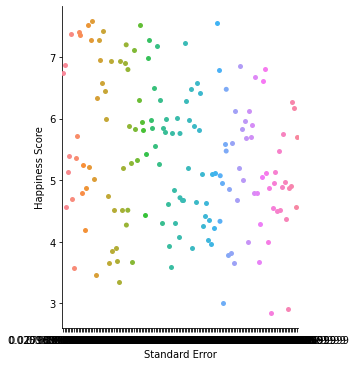

In [25]:
# Finding the impact of Standard Error on the Happiness Score
sns.catplot(x='Standard Error',y='Happiness Score',data=df)

In [26]:
# There is no linear realtionship between the Standard error and the Happiness Score

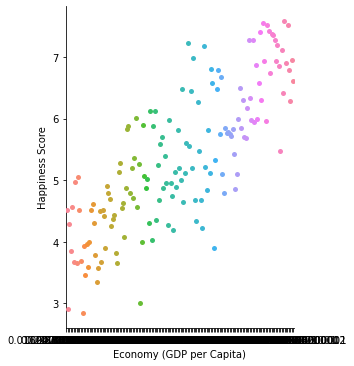

In [27]:
# Finding the impact of Economy (GDP per Capita) on the Happiness Score
sns.catplot(x='Economy (GDP per Capita)',y='Happiness Score',data=df)

In [28]:
# From this we can infer that there is a linear relationship here and as the Economy(GDP per Capita) increases, there is an 
# increase in the Happiness score too

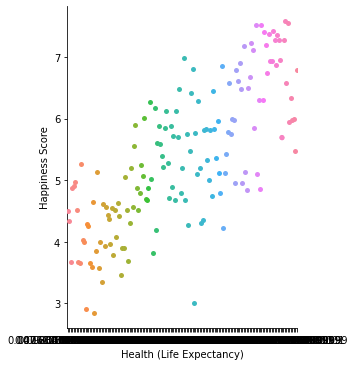

In [29]:
# Finding the impact of Health (Life Expectancy) on the Happiness Score
sns.catplot(x='Health (Life Expectancy)',y='Happiness Score',data=df)

In [30]:
# Here also we find the linear relationship between the Health (Life Expectancy) and the Happiness Score
# As the "Health (Life Expectancy)" value increases the "Happiness Score" also increases

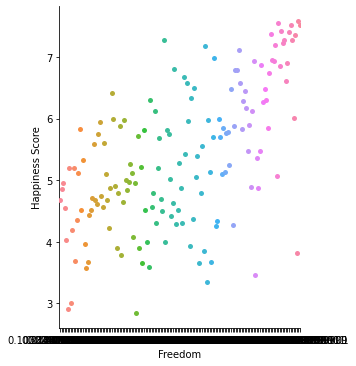

In [31]:
# Finding the impact of Freedom on the Happiness Score
sns.catplot(x='Freedom',y='Happiness Score',data=df)

In [32]:
# Here also we find the linear relationship between the Freedom and the Happiness Score
# As the "Freedom" value increases the "Happiness Score" also increases
# Freedom within the country increases the Happiness among its citizens

<AxesSubplot:xlabel='Happiness Score', ylabel='Density'>

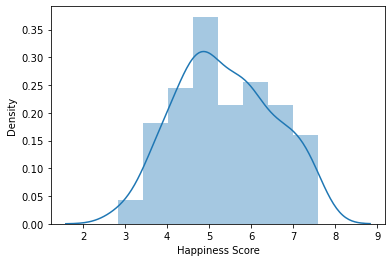

In [33]:
sns.distplot(df['Happiness Score'],kde=True)

In [34]:
# Here we can see the distribution of Happiness Score over different densities

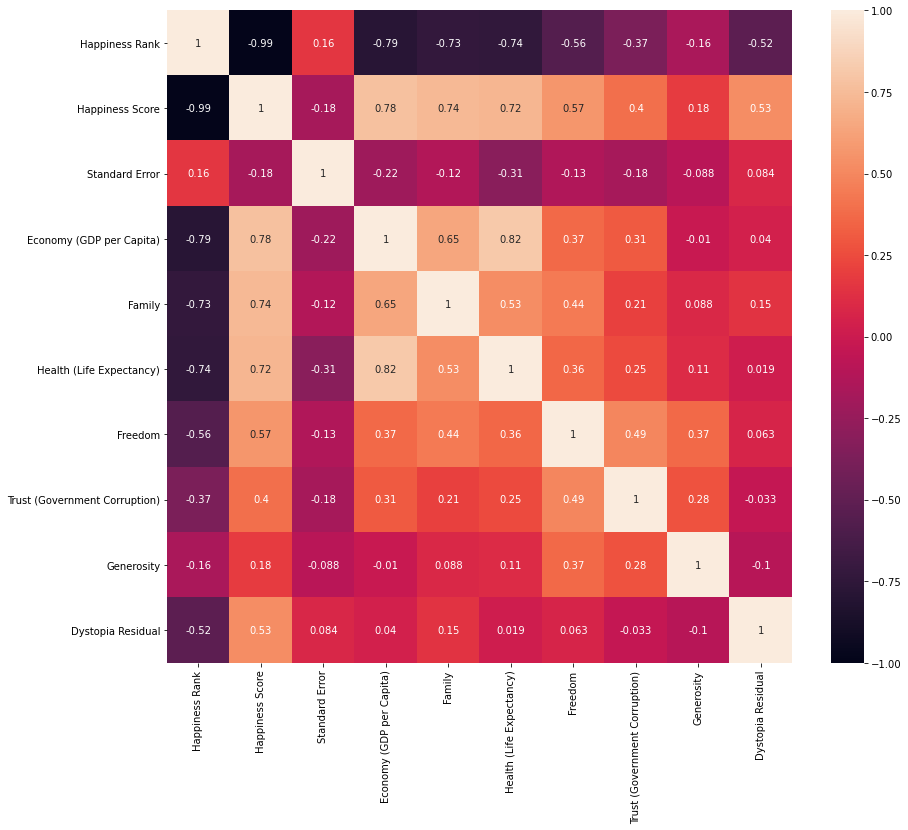

In [35]:
plt.figure(figsize=(14, 12))
sns.heatmap(df.corr(), annot=True, vmin=-1.0, vmax=1.0)
plt.show()

In [36]:
# From this heatmap we have got the correlation values and we can see that the columns "Economy","Family" and "Health" have very
# high positive correlation with the target columns
# So the higher the value of these 3 columns the higher is the Happiness Score
# We can also observe that the columns "Dystopia Residual" and "Freedom" also have good correlation with the target column
# The column "Standard error" has the weak negative correlation value(-0.18) with the target variable(not a very important
# factor because the correlation value is close to zero)
# We can see that the column "Happiness Rank" has a very strong negative correlation with the target column which means that
# the value of Happiess Rank is less when the value of Happiness score is higher.

In [37]:
df.drop(["Region","Country"],axis=1,inplace=True)

In [38]:
df

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...
153,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [ ]:
# Checking the columns which are positively and negatively correlated with the target columns

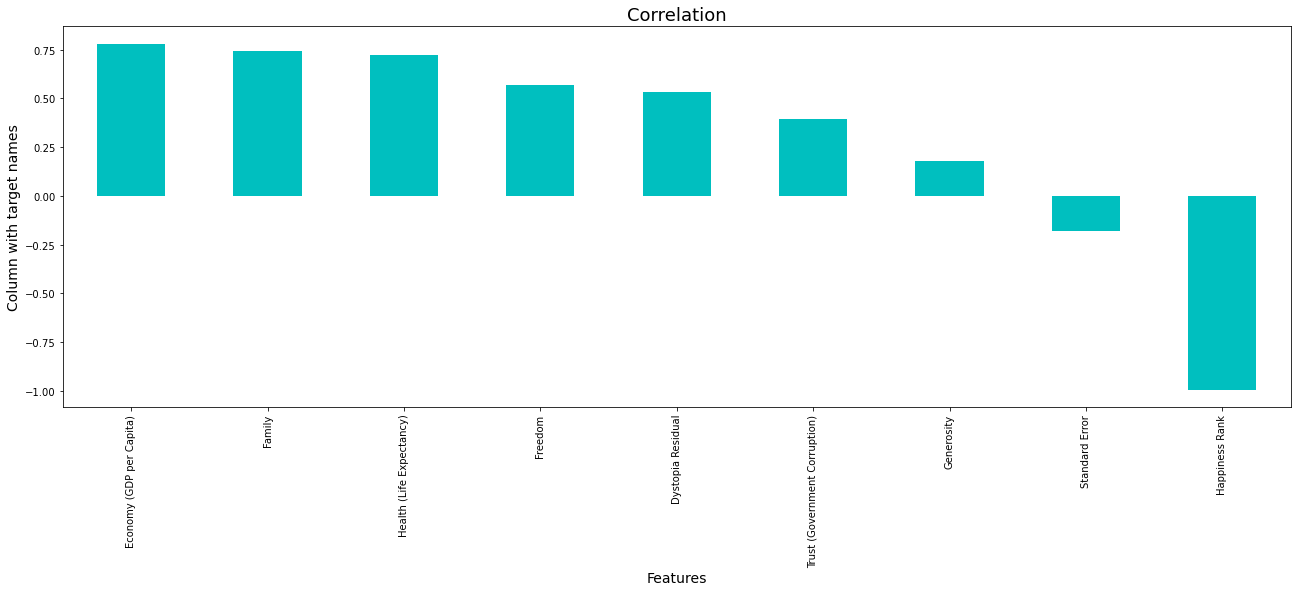

In [40]:
plt.figure(figsize=(22,7))
df.corr()['Happiness Score'].sort_values(ascending=False).drop(["Happiness Score"]).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('Column with target names',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

In [60]:
# The above graph shows how the various features are correlated with the target column variable.
# The columns Economy, Family, Health, Freedom, Dystopia Residual, Trust and Generosity all have Positive correlation with that 
# the target variable
# Economy, Family and Health have a very strong positive impact with Happiness Score
# Standard Error and Happiness Rank had negative correlation with the Happiness Score
# Happiness Rank has very strong negative correlation value and as the rank decreases the score increases
# (Eg., Rank 1 will have very high Happiness score compared to all other rank values)

In [ ]:
# Checking for the presence of outliers individually.

<AxesSubplot:xlabel='Economy (GDP per Capita)'>

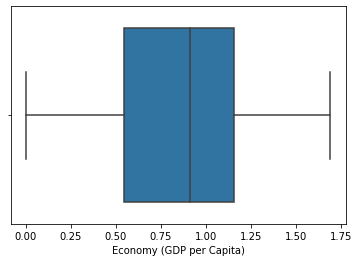

In [50]:
sns.boxplot(df["Economy (GDP per Capita)"])

In [ ]:
# There are no outliers for the column Economy (GDP per Capita)

<AxesSubplot:xlabel='Family'>

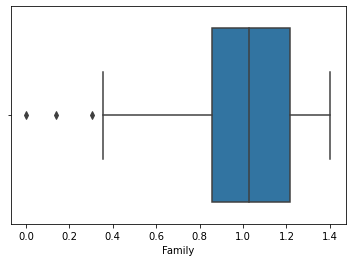

In [51]:
sns.boxplot(df["Family"])

In [ ]:
# We can see the presence of outliers in the column Family

<AxesSubplot:xlabel='Health (Life Expectancy)'>

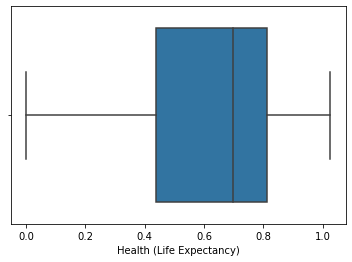

In [52]:
sns.boxplot(df["Health (Life Expectancy)"])

In [ ]:
# There are no outliers for the column Health (Life Expectancy)

<AxesSubplot:xlabel='Freedom'>

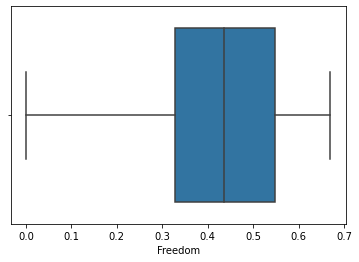

In [53]:
sns.boxplot(df["Freedom"])

In [ ]:
# There are no outliers for the column Freedom

<AxesSubplot:xlabel='Dystopia Residual'>

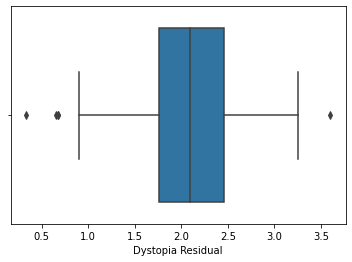

In [54]:
sns.boxplot(df["Dystopia Residual"])

In [ ]:
# We can see the presence of outliers in the column Dystopia Residual

<AxesSubplot:xlabel='Trust (Government Corruption)'>

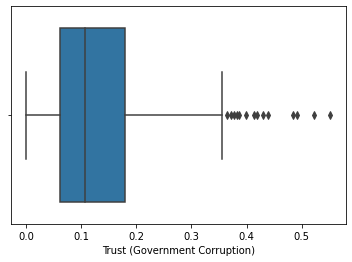

In [55]:
sns.boxplot(df["Trust (Government Corruption)"])

In [ ]:
# We can see the presence of outliers in the column Trust (Government Corruption)

<AxesSubplot:xlabel='Generosity'>

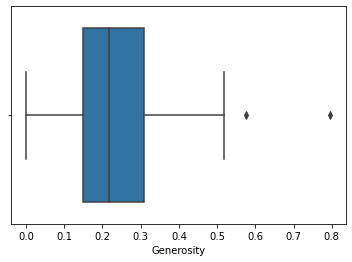

In [56]:
sns.boxplot(df["Generosity"])

In [ ]:
# We can see the presence of outliers in the column Generosity

<AxesSubplot:xlabel='Standard Error'>

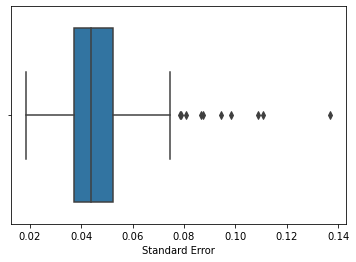

In [57]:
sns.boxplot(df["Standard Error"])

In [ ]:
# We can see the presence of outliers in the column Standard Error

<AxesSubplot:xlabel='Happiness Rank'>

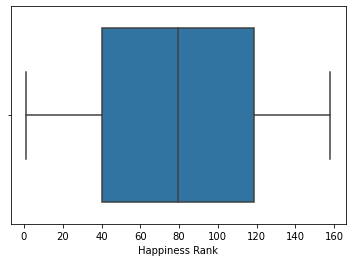

In [58]:
sns.boxplot(df["Happiness Rank"])

In [ ]:
# There are no outliers in the column Happiness Rank

<AxesSubplot:>

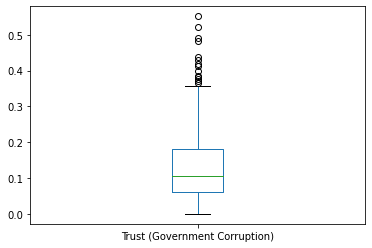

In [59]:
df["Trust (Government Corruption)"].plot.box()  # Finding outliers for int and float type columns

In [61]:
df.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

In [ ]:
# We can see the presence of skewness in our data
# As we saw the presence of outliers and hence the skewness is present
# -(0.5) to +(0.5), the skewness within this range is acceptable
# We have skewness of few columns outside the above mentioned range and they need to be treated. The columns with high skewness 
# are "Standard Error", "Family", "Health", "Trust", "Generosity".

# Considering to remove the outliers

In [69]:
df.shape  # info of data before removing the outliers

(158, 10)

In [64]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([ 27,  40,  64, 115, 128, 147, 153, 155, 157], dtype=int64),
 array([7, 2, 2, 2, 8, 4, 7, 9, 4], dtype=int64))

In [65]:
df_new_z=df[(z<3).all(axis=1)] 
df_new_z

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...
150,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [70]:
df_new_z.shape  # info of data after removing outliers

(149, 10)

In [ ]:
# Calculating the percentage of data loss

In [71]:
Data_loss=((158-149)/158)*100

In [72]:
Data_loss

5.69620253164557

In [ ]:
# So here we can see that we have lost nearly 5-6 % of data after removing the outliers and is acceptable

In [74]:
df_new_z.skew()   # skewness is reduced comparitively

Happiness Rank                   0.003268
Happiness Score                  0.169740
Standard Error                   1.243048
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)    1.272530
Generosity                       0.654710
Dystopia Residual               -0.021144
dtype: float64

In [76]:
df_new_z.describe() 

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,77.617450,5.429611,0.046241,0.862163,1.008623,0.638624,0.427449,0.140405,0.231500,2.120862
std,44.854208,1.111256,0.014043,0.387975,0.251890,0.245937,0.150864,0.113385,0.119897,0.525654
min,1.000000,2.905000,0.018480,0.000000,0.302850,0.000000,0.000000,0.000000,0.000000,0.654290
25%,39.000000,4.610000,0.036800,0.593250,0.885880,0.467210,0.328180,0.061460,0.142720,1.792930
50%,78.000000,5.268000,0.043610,0.920490,1.035160,0.703800,0.434500,0.107130,0.213330,2.100170
75%,115.000000,6.295000,0.050690,1.159910,1.223930,0.814440,0.546040,0.175210,0.300300,2.465310
max,157.000000,7.587000,0.098110,1.563910,1.402230,1.025250,0.669730,0.492100,0.576300,3.602140


# Separating the columns into features and target

In [78]:
X = df_new_z.drop("Happiness Score",axis=1)
y=df_new_z["Happiness Score"]

# Scaling the data using Min-Max scaler

In [79]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [80]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30) # Splitting data into test and train set

In [81]:
lr.fit(X_train,y_train) # Fitting the training data to our Linear Regression model

LinearRegression()

In [82]:
pred_test=lr.predict(X_test)   # performing the predictions on test

In [83]:
print(r2_score(y_test,pred_test))

0.9999999321099274


In [ ]:
# So here from the Linear Regression model we achieved 99.9% using r2_score as our evaluation model

In [103]:
cv_score=cross_val_score(lr,X,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.9999981259532401

In [ ]:
# Difference between r2_score and cv is 0.0001 

# Regularization

In [85]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [87]:
from sklearn.linear_model import Lasso
parameters = {'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf= GridSearchCV(ls,parameters)
clf.fit(X_train,y_train)
print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [ ]:
# By performing GridSearchCV on Lasso model we found the best parameters alpha=0.0001 and random_state=0

In [89]:
ls=Lasso(alpha=0.0001,random_state=0)
ls.fit(X_train,y_train)
ls.score(X_train,y_train)
pred_ls=ls.predict(X_test)

lss=r2_score(y_test,pred_ls)
lss

0.9999441193090459

In [ ]:
# I have fit the best paramters into the Lasso regression model and fetched the accuracy 99.9944%

In [92]:
cv_score=cross_val_score(ls,X,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.9976799043418616

In [ ]:
# The cross validation score achieved is 99.76%

In [ ]:
# So here in Lasso we have least difference between the r2_score and the CV score 99.9944-99.7679 = 0.2265
# We have achieved the performance very close to 100% and is not due to other resons like over-fitting which is proved when 
# value for cv_score was found
# The same thing is proved with just the Linear Regression
# So here in Linear Regression we have least difference between the r2_score and the CV score 99.9999-99.9998 = 0.0001
# There is no much need to perform on various other models and considering this Linear Regression as the best model